# Introducción a Deep Learning con Lasagne

### Qué es Machine Learning ? 

A learning problem considers a set of n samples of data and then tries to predict properties of unknown data. If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), is it said to have several attributes or features.

We can separate learning problems in a few large categories:

- Supervised learning, in which the data comes with additional attributes that we want to predict.
   - classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data.
   - regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

- Unsupervised learning, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization.

![alt text](images/deeplearning.jpg "dl")
### Qué es Deep Learning ?

Deep learning permite que modelos computacionales compuestos por varias capas de procesamiento puedan aprender representaciones sobre datos con múltiples niveles de abstracción y, mediante esto, descubrir representaciones precisas en grandes volúmenes de datos de forma autónoma. 
Particularmente, Convolutional Neural Networks (ConvNets) constituyen el estado del arte de varios problemas de visión computacional, dado su gran desempeño de clasificación en grandes volúmenes de imágenes. Su gran performance está basada en cuatro ideas basales: conexiones locales, pesos compartidos, pooling y el uso de varias capas. 
![alt text](images/capas_de_abstracci.png "structure")


### ConvNets
Una arquitectura clásica de ConvNet esta dada por dos etapas. La primer etapa se enfoca en **extraer características discriminantes** a distintos niveles de abstracción y la segunda se enfoca en la **clasificación** a partir de las características obtenidas previamente. La primera instancia esta compuesta por dos tipos de capas: de convolución y *pooling*.

#### Arquitectura de ConvNets
Las arquitecturas de ConvNets asumen que los datos con los que se trabajara son arreglos multidimensionales, gracias a esta suposición varias cualidades de los datos se pueden embeber en la arquitectura de la red. A diferencia de las redes neuronales convencionales, las *ConvNets* cuentan con unidades organizadas en tres dimensiones: ancho, alto y profundidad. Por ejemplo en nuestro caso tenemos imagenes de 128x128 pixels en escala de grises, por lo que las dimensiones de nuestro volumen de entrada serían 128x128x1.
![alt text](images/cnn.jpg "structure from http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")

#TODO
### Formas de Aprendizaje

### Tipos de Capas

In [3]:
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
                           MaxPool2DLayer, DenseLayer
from lasagne.nonlinearities import rectify

#### Capas Densas

Todas las unidades ocultas estan conectadas con todas las unidades de entrada!

In [11]:
(DenseLayer, {'num_units': 256, 'nonlinearity': rectify})

(lasagne.layers.dense.DenseLayer,
 {'nonlinearity': <function lasagne.nonlinearities.rectify>, 'num_units': 256})

#### Capas de Convolución

En las capas de convolución, las unidades estan organizadas en feature maps, en las cuales cada unidad
esta conectada a patches locales de los feature maps pertenecientes a la capa anterior mediante un conjunto de pesos, llamadosfilter bank. Todas las unidades dentro de un feature map comparten el mismo filter bank, distintos feature maps dentro de la misma capa usan diferentes filter banks, la disposición de estos tiene dos justificaciones, por un lado, datos en forma de arreglos, como en nuestro caso, imágenes, subconjuntos locales tienden a estar altamente correlacionados y por otro lado la estadística local de las imágenes son invariantes a su ubicación.



![alt text](images/Convolution_schematic.gif "gif de http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")
*http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/


In [5]:
(Conv2DLayer, {'num_filters': 32, 'filter_size': 2})

(lasagne.layers.conv.Conv2DLayer, {'filter_size': 2, 'num_filters': 32})

#### Max Pooling
Para reducir la dimensionalidad de los *feature maps*, una capa de *pooling* es ubicada entre las capas de convolución. Las capas de *pooling* eliminan los valores no máximos calculando una función de agregación, comunmente se utiliza el maximo o el promedio sobre pequeñas regiones de la entrada. El proposito general de las capas de *pooling* es reducir el costo computacional en las capas ulteriores, reduciendo el tamaño de los futuros mapas de características y otorgando una forma de invariancia traslacional.


![alt text](images/maxpool.jpg " imagen de http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")

In [12]:
(MaxPool2DLayer, {'pool_size': 2})

(lasagne.layers.pool.MaxPool2DLayer, {'pool_size': 2})


#### Dropout

Dropout es una técnica que previene que una red caiga en *overfitting* y provee una manera de combinar de forma eficiente varias arquitecturas de redes neuronales juntas.
El termino de dropout se refiere al descarte de unidades y sus conexiones (ya sea en capas ocultas o no) en una red neuronal, este descarte es solo temporal. La forma de elección de descarte es aleatoria, a cada unidad se le asocia un valor de probabilidad p independiente del resto entre [0, 1].
![alt text](images/dropout.png " imagen de XXXXX")

In [13]:
(DropoutLayer, {'p': 0.5})

(lasagne.layers.noise.DropoutLayer, {'p': 0.5})

## Lasagne


In [1]:
from IPython.display import IFrame
IFrame('http://lasagne.readthedocs.io/en/latest/', width=900, height=350)

# Clasifiquemos el tipo de nave que aparece en la imagen!

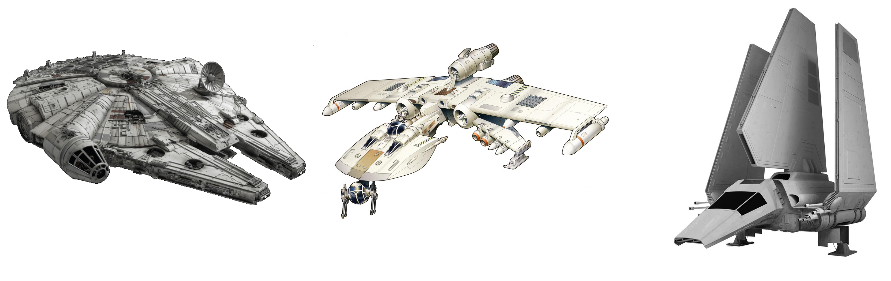

In [3]:
from IPython.display import Image
Image(filename='images/ships.png') 

# Cómo son nuestros datos de entrada?
![alt text](images/dataset.png)

#### Cargando Imágenes a un Dataframe

In [14]:
import os
import pandas as pd
import cv2

In [15]:
def images_to_file(path_to_photos):
    """ """
    ids = [os.path.splitext(image_id)[0] for image_id in os.listdir(path_to_photos)]
    df_out = pd.DataFrame(columns=['Image', 'Model', 'Model_enc'], index=ids)
    for image_file in os.listdir(path_to_photos):
            image = cv2.imread(os.path.join(path_to_photos, image_file), 0)
            df_out['Image'][os.path.splitext(image_file)[0]] = ' '.join(map(str, image.flatten()))
            df_out['Model'][os.path.splitext(image_file)[0]] = image_file.split('_')[0]
       
    catenc = pd.factorize(df_out['Model'])
    df_out['Model_enc'] = catenc[0]
    print catenc
    df_out.to_csv('./star_wars_data.csv')
    return df_out

In [16]:
images_to_file("data/all/")

(array([0, 1, 1, ..., 0, 0, 1]), Index([u'falcon', u'lambda', u'kwing'], dtype='object'))


,Image,Model,Model_enc
falcon_165,135 94 30 14 3 7 2 7 5 7 6 4 6 5 20 58 58 20 2...,falcon,0
lambda_000163,123 127 123 117 119 123 128 134 136 131 125 12...,lambda,1
lambda_000164,119 117 117 120 125 129 130 130 129 132 135 13...,lambda,1
lambda_052,107 108 107 105 104 103 102 100 140 158 157 15...,lambda,1
kwing_00098,0 13 43 83 104 111 124 132 138 138 130 113 101...,kwing,2
kwing_000224,7 23 29 9 8 12 16 20 8 29 40 24 30 38 41 43 41...,kwing,2
kwing_000121,27 18 16 17 8 0 1 7 21 23 21 7 2 2 33 68 53 53...,kwing,2
lambda_092,170 174 176 176 178 182 183 181 181 180 177 17...,lambda,1
falcon__154,19 21 24 25 28 31 32 32 29 44 37 20 21 50 72 8...,falcon,0
lambda_0108,126 129 130 127 126 127 129 130 129 130 130 12...,lambda,1


#### Cómo quedo el archivo que generamos?

In [18]:
!more ./star_wars_data.csv

,Image,Model,Model_enc
falcon_165,135 94 30 14 3 7 2 7 5 7 6 4 6 5 20 58 58 20 20 18 17 26 22 29 20 6 1
1 10 14 47 81 140 144 150 163 146 99 115 117 140 141 153 157 93 102 204 139 115 
140 150 63 14 20 35 38 32 63 49 53 42 65 67 75 107 159 117 37 68 113 43 102 57 3
0 37 52 20 12 22 23 34 24 28 29 66 94 56 38 46 53 39 23 53 58 21 63 119 152 81 7
6 148 161 253 228 172 212 242 228 223 227 213 168 177 164 138 105 125 147 144 14
4 132 140 130 124 130 127 137 174 196 79 41 36 18 11 5 5 4 6 5 5 7 9 5 15 48 60 
22 13 14 18 25 21 25 24 11 11 9 10 36 69 125 143 145 153 150 104 113 113 128 142
 145 165 160 109 161 166 133 126 161 79 10 39 36 43 40 43 47 37 47 56 69 114 136
 157 88 45 89 137 76 87 111 74 61 34 15 14 18 25 16 24 16 23 69 90 56 36 35 45 3
9 32 34 49 26 55 139 100 65 79 67 152 255 221 171 225 224 192 167 166 177 162 16
4 155 121 107 124 157 156 128 128 132 129 132 156 183 202 206 189 28 42 42 17 19
 31 1 16 8 5 5 8 11 5 10 36 60 28 9 11 16 18 20 23 25 16 10 11 9 24 58 110 137 1
36 14

#### Ahora a darle formato a nuestros datos para nuestra red ...

In [19]:
import numpy as np
from sklearn.utils import shuffle

In [20]:
def load(images_dir="data/all/"):
    """Load images and target class for Falcon, Lambda and K-wing ships."""
    df = images_to_file(images_dir)
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    y = df['Model_enc'].values
    X, y = shuffle(X, y, random_state=42)
    y = y.astype(np.int32)
    
    return X, y

#### Qué necesitamos para armar nuestras redes ??

In [21]:
import theano
import lasagne
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import BatchIterator
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
                           MaxPool2DLayer, DenseLayer

#### Y para chequear nuestros resultados??

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from nolearn.lasagne import visualize

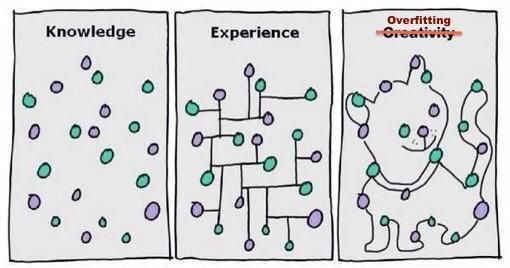

In [23]:
from IPython.display import Image
Image(filename='images/overfitting.jpg') 

#### Wooooot, wait! que es una matriz de confusión?
TODO

#### Cómo se define la arquitectura de nuestra red ?!

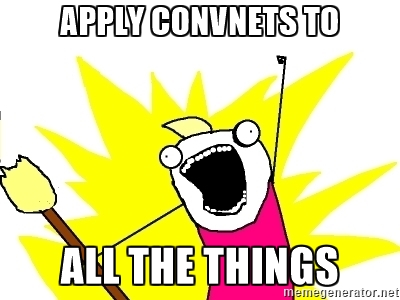

In [24]:
from IPython.display import Image
Image(filename='images/convnets.jpg', width=300)

In [51]:
def create_net(max_epochs=100):
    return NeuralNet(
        layers=[
                (InputLayer, {'shape': (None, 1, 128, 128)}),
                (Conv2DLayer, {'num_filters': 32, 'filter_size': 2}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (Conv2DLayer, {'num_filters': 32, 'filter_size': 2}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DenseLayer, {'num_units': 256, 'nonlinearity': lasagne.nonlinearities.rectify}),
                (DropoutLayer, {'p': 0.5}),
                (DenseLayer, {'num_units': 3, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ],
        update=nesterov_momentum,
        update_learning_rate=theano.shared(np.float32(0.03)),
        update_momentum=theano.shared(np.float32(0.9)),
        regression=False,
        #batch_iterator_train=FlipBatchIterator(batch_size=50),
        #on_epoch_finished=[
        #    AdjustVariable('update_learning_rate', start=0.03, stop=0.001),
        #    AdjustVariable('update_momentum', start=0.9, stop=0.9999)  # ,
        #],
        max_epochs=max_epochs,
        verbose=1)

In [33]:
x, y = load()
x = x.reshape(-1, 1, 128, 128)
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)
print X_train.shape

(array([0, 1, 1, ..., 0, 0, 1]), Index([u'falcon', u'lambda', u'kwing'], dtype='object'))
(2591, 1, 128, 128)


In [52]:
net = create_net(20)
net.fit(X_train, y_train)

# Neural Network with 7877827 learnable parameters

## Layer information

  #  name        size
---  ----------  ----------
  0  input0      1x128x128
  1  conv2d1     32x127x127
  2  maxpool2d2  32x63x63
  3  conv2d3     32x62x62
  4  maxpool2d4  32x31x31
  5  dense5      256
  6  dropout6    256
  7  dense7      3

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       1.07908       1.01446      1.06370      0.62969  3.51s
      2       0.92324       0.86816      1.06345      0.61094  3.49s
      3       0.82665       0.63269      1.30656      0.71094  3.50s
      4       0.55391       0.38002      1.45757      0.87031  3.51s
      5       0.37744       0.18063      2.08961      0.94844  3.49s
      6       0.20705       0.14566      1.42147      0.94531  3.49s
      7       0.14166       0.07022      2.01756      0.97813  3.49s
      8       0.08714       0.05090      1.71199      0.98750 

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f79222d62d0>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f79222d6250>,
     custom_score=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (None, 1, 128, 128)}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'filter_size': 2, 'num_filters': 32}), (<class 'lasagne.layers.pool.MaxPool2DLayer'>, {'pool_size': 2}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'filter_size': 2, 'n....layers.dense.DenseLayer'>, {'num_units': 3, 'nonlinearity': <function softmax at 0x7f794edc6230>})],
     loss=None, max_epochs=20, more_params={},
     objective=<function objective at 0x7f79222d5b18>,
     objective_loss_function=<function categorical_crossentropy at 0x7f794e97c230>,
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x7f7913df15f0>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.Pr

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

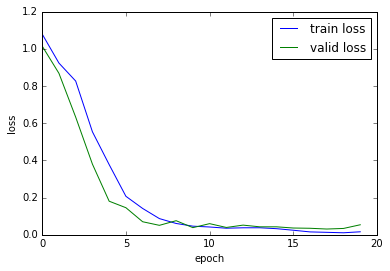

In [53]:
%matplotlib inline
visualize.plot_loss(net)

In [30]:
def plot_matrix(clf, X_test, y_test):
    """Plot Confussion Matrix from a given classifier"""
   
    plt.clf()
    
    cm = confusion_matrix(y_test, clf.predict(X_test))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    cm_normalized[np.isnan(cm_normalized)] = 0.0
    print(cm_normalized)
    plt.tick_params(labelsize=20)

    ax = plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Reds)
    cb = plt.colorbar()
    cb.ax.tick_params(axis='both', labelsize=20)
    plt.ylabel("True label", fontsize=20)
    plt.xlabel("Predicted label", fontsize=20)
    plt.xticks(range(3),range(3))
    plt.yticks(range(3),range(3))



Normalized confusion matrix
[[ 0.98382749  0.01617251  0.        ]
 [ 0.00529101  0.99470899  0.        ]
 [ 0.00552486  0.00828729  0.98618785]]
[[365   6   0]
 [  2 376   0]
 [  2   3 357]]


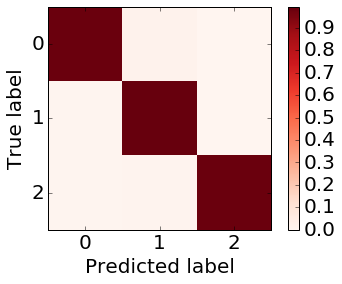

In [54]:
plot_matrix(net, X_test, y_test)
print confusion_matrix(y_test, net.predict(X_test))

In [28]:
net.layers

[(lasagne.layers.input.InputLayer, {'shape': (None, 1, 128, 128)}),
 (lasagne.layers.conv.Conv2DLayer, {'filter_size': 2, 'num_filters': 32}),
 (lasagne.layers.pool.MaxPool2DLayer, {'pool_size': 2}),
 (lasagne.layers.conv.Conv2DLayer, {'filter_size': 2, 'num_filters': 64}),
 (lasagne.layers.pool.MaxPool2DLayer, {'pool_size': 2}),
 (lasagne.layers.dense.DenseLayer,
  {'nonlinearity': <function lasagne.nonlinearities.rectify>,
   'num_units': 256}),
 (lasagne.layers.dense.DenseLayer,
  {'nonlinearity': <function lasagne.nonlinearities.softmax>, 'num_units': 3})]

/usr/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


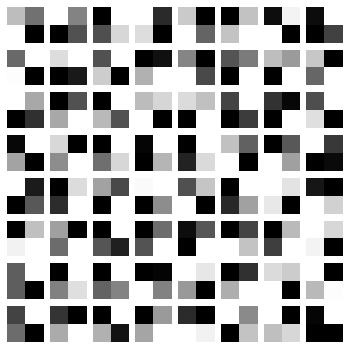

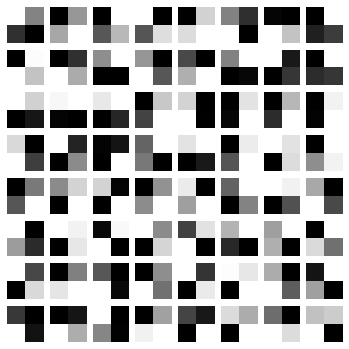

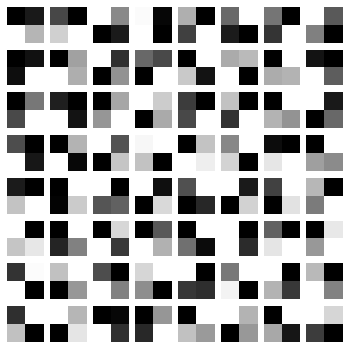

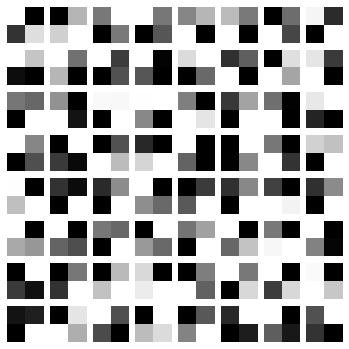

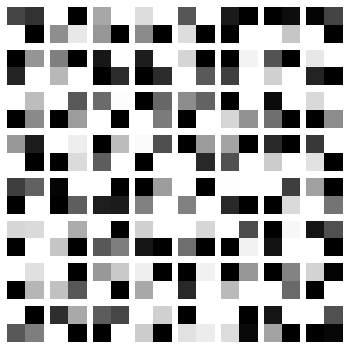

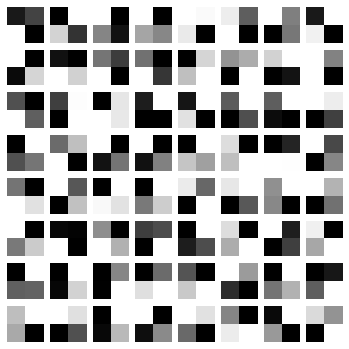

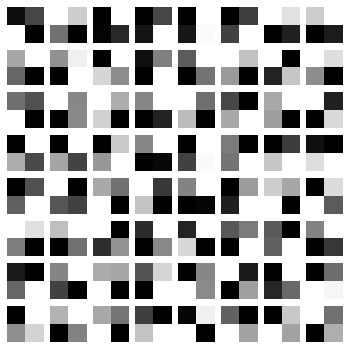

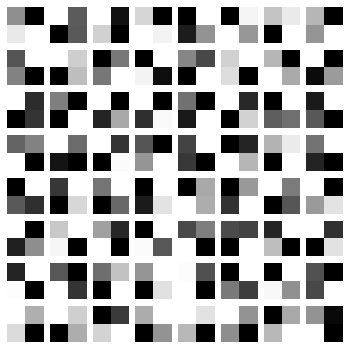

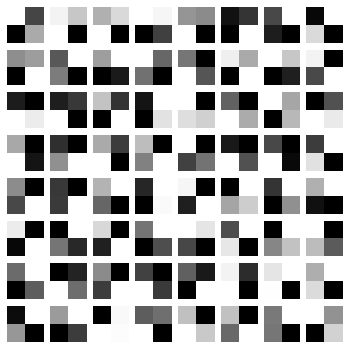

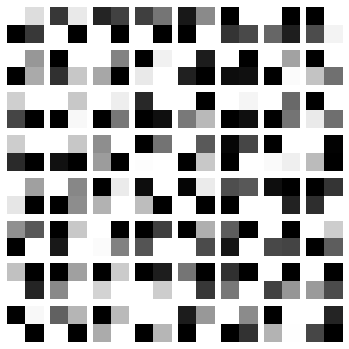

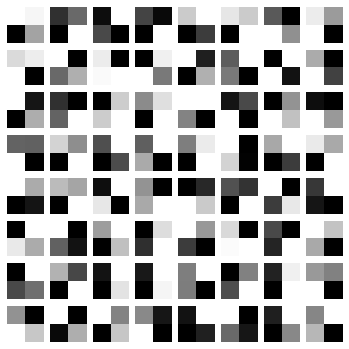

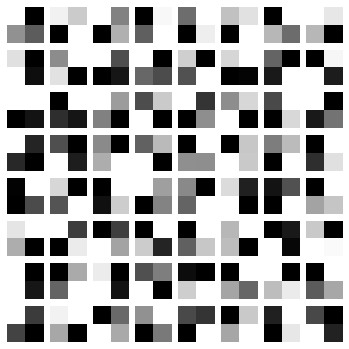

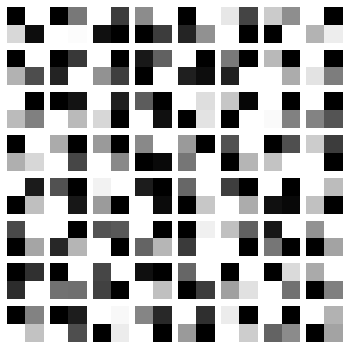

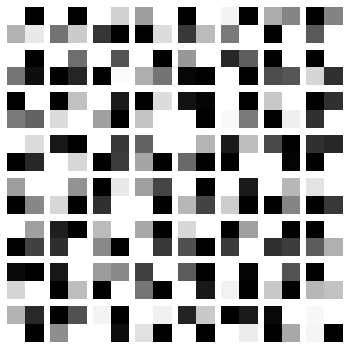

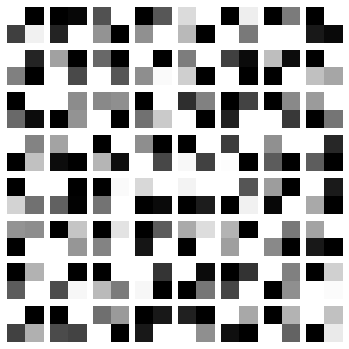

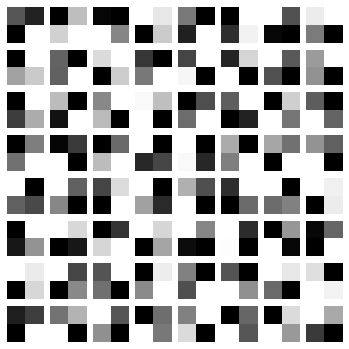

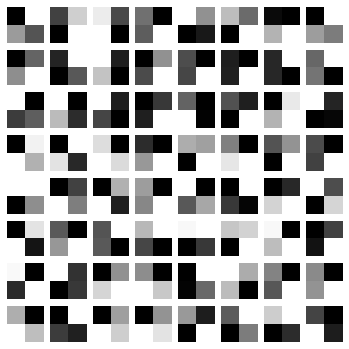

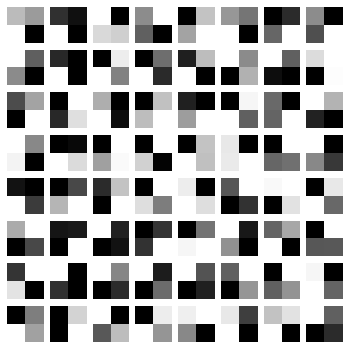

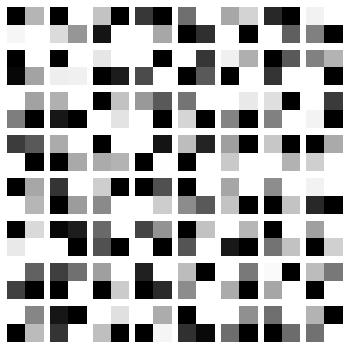

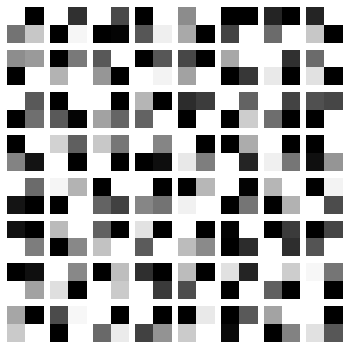

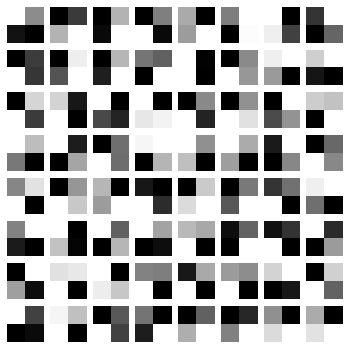

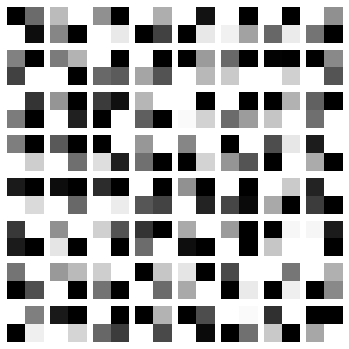

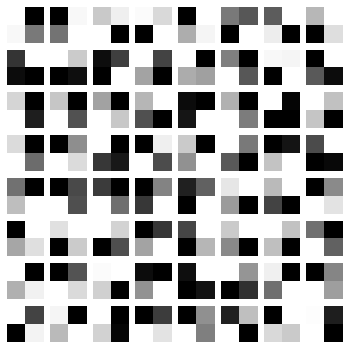

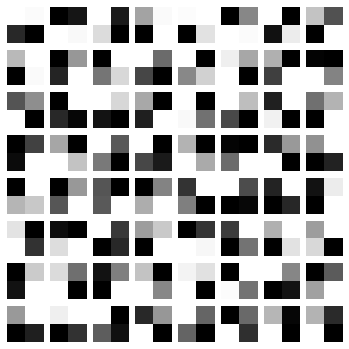

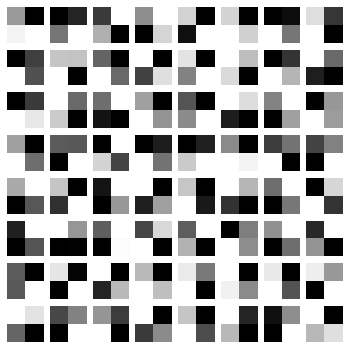

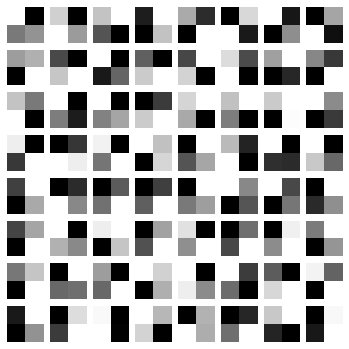

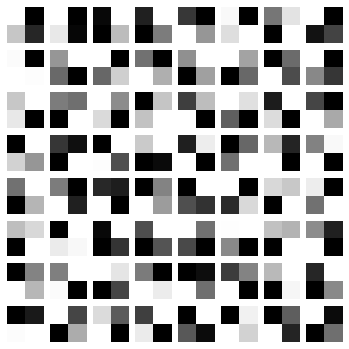

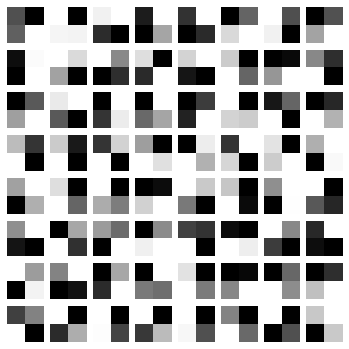

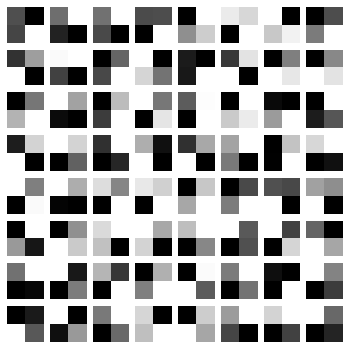

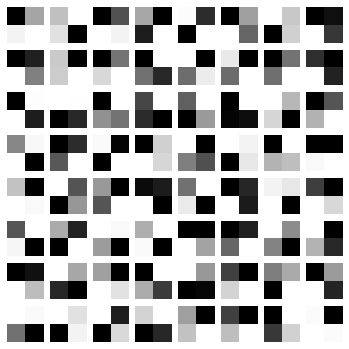

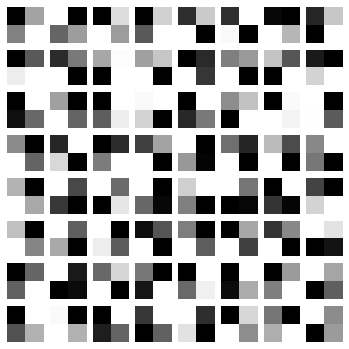

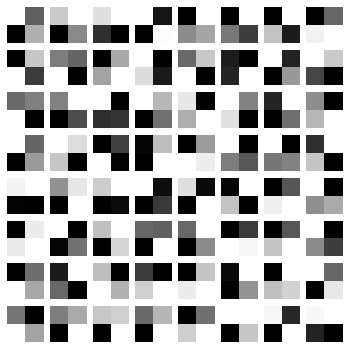

In [16]:
visualize.plot_conv_weights(net.layers_[3])

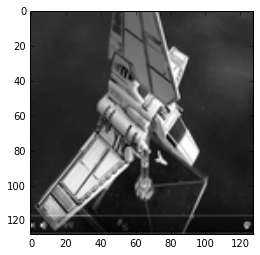

In [55]:
my_image = cv2.imread("data/lambda.png", 0)
plt.imshow(my_image, cmap='gray')

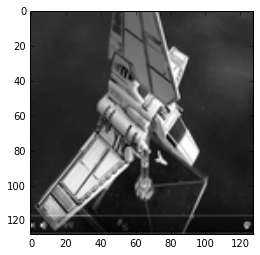

In [56]:
X = np.vstack(my_image) / 255.
plt.imshow(X, cmap='gray')
X = X.astype(np.float32)
X = X.reshape(-1, 1, 128, 128)

In [34]:
X_test[:1, :, :, :].shape

(1, 1, 128, 128)

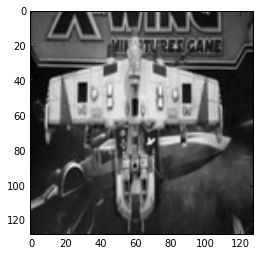

In [57]:
plt.imshow(X_test[1000][0], cmap='gray')

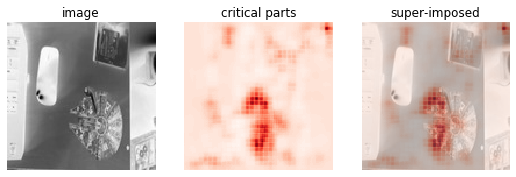

In [66]:
h = visualize.plot_occlusion(net, X_test[100:101, :, :, :], [0], square_length=7)

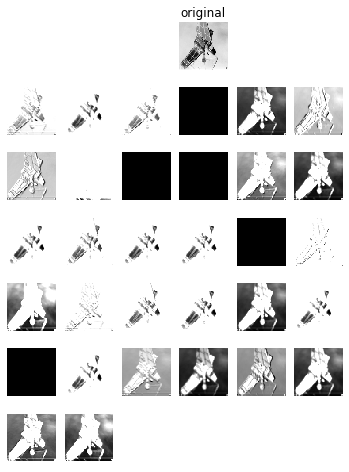

In [67]:
visualize.plot_conv_activity(net.layers_['conv2d3'], X)

In [60]:
net.predict(X_test[10:11, :, :, :])

array([2])

In [25]:
np.argmax(net.predict_proba(X_test[10:11, :, :, :]))

2

In [29]:
net.predict_proba(X_test[10:11, :, :, :])

array([[  2.24187403e-04,   1.99347560e-05,   9.99755919e-01]], dtype=float32)

In [30]:
confusion_matrix(y_test, net.predict(X_test))

array([[364,   3,   5],
       [ 14, 282,   1],
       [  3,   3, 355]])

In [56]:
def format_net(my_image):
        X = np.vstack(my_image) / 255.
        X = X.astype(np.float32)
        X = X.reshape(-1, 1, 128, 128)
        
        return X

In [1]:
def classifier_over_video(file_name, d_path):
    cap = cv2.VideoCapture(file_name)
    frames_count = cap.get(7)
    clase = []
    for frame_id in range(int(frames_count)):
        ret, frame = cap.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame = cv2.equalizeHist(frame)
        res = cv2.resize(frame, (128, 128), interpolation = cv2.INTER_CUBIC)
        X = format_net(res)
        clase.append(net.predict(X))
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, 'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        #counts = np.bincount(a)
        #print np.argmax(counts)
        #cv2.cv.PutText(frame, str(clase), (10, 10),font, 255) #Draw the text
        #cv2.imwrite("{}image-{}-{}.jpg".format(d_path, str(frame_id), clase), frame)

In [2]:
classifier_over_video("data/videos/VID_20160826_134137.mp4", "/tmp/")

NameError: global name 'cv2' is not defined

# 2. Find the ship on the image

In [5]:
import pandas as pd

In [10]:
data_coordinates = pd.read_json("/home/celia/Desktop/otro.json")

In [26]:
annotations = data_coordinates.drop(['class'], axis=1)

In [28]:
annotations['filename']

0       ../Code/star_wars_hackathon/data/all/falcon_00...
1       ../Code/star_wars_hackathon/data/all/falcon_00...
2       ../Code/star_wars_hackathon/data/all/falcon_00...
3       ../Code/star_wars_hackathon/data/all/falcon_00...
4       ../Code/star_wars_hackathon/data/all/falcon_01...
5       ../Code/star_wars_hackathon/data/all/falcon_00...
6       ../Code/star_wars_hackathon/data/all/falcon_00...
7       ../Code/star_wars_hackathon/data/all/falcon_00...
8       ../Code/star_wars_hackathon/data/all/falcon_00...
9       ../Code/star_wars_hackathon/data/all/falcon_02...
10      ../Code/star_wars_hackathon/data/all/falcon_00...
11      ../Code/star_wars_hackathon/data/all/falcon_00...
12      ../Code/star_wars_hackathon/data/all/falcon_00...
13      ../Code/star_wars_hackathon/data/all/falcon_00...
14      ../Code/star_wars_hackathon/data/all/falcon_03...
15      ../Code/star_wars_hackathon/data/all/falcon_00...
16      ../Code/star_wars_hackathon/data/all/falcon_00...
17      ../Cod

In [ ]:
import xml.etree.ElementTree as ET
tree = ET.parse('data/boxes/falcon_0000.xml')
e = tree.getroot()


In [ ]:
e.find("object/bndbox/ymin").text

In [ ]:
e.find("path").text

In [ ]:
!more data/boxes/falcon_0000.xml

In [ ]:
def images_to_file_xml(path_to_xml):
    ids = [os.path.splitext(image_id)[0] for image_id in os.listdir(path_to_xml)]
    df_out = pd.DataFrame(columns=['Image', 'Model', 'Model_enc', 'xmin', 'xmax', 'ymax', 'ymin'], index=ids)
    for xml_file in os.listdir(path_to_xml):
            tree = ET.parse(os.path.join(path_to_xml, xml_file))
            e = tree.getroot()
            image = cv2.imread(e.find("path").text, 0)
            df_out['Image'][os.path.splitext(xml_file)[0]] = ' '.join(map(str, image.flatten()))
            df_out['Model'][os.path.splitext(xml_file)[0]] = xml_file.split('_')[0]
            df_out['xmin'][os.path.splitext(xml_file)[0]] = int(e.find("object/bndbox/xmin").text)
            df_out['xmax'][os.path.splitext(xml_file)[0]] = int(e.find("object/bndbox/xmax").text)
            df_out['ymin'][os.path.splitext(xml_file)[0]] = int(e.find("object/bndbox/ymin").text)
            df_out['ymax'][os.path.splitext(xml_file)[0]] = int(e.find("object/bndbox/ymax").text)
       
    catenc = pd.factorize(df_out['Model'])
    df_out['Model_enc'] = catenc[0]
    print catenc
    df_out.to_csv('/tmp/star_wars_data_box.csv')
    return df_out

In [ ]:
images_to_file_xml("data/boxes/")